# Explora aquí

Se recomienda utilizar este cuaderno con fines de exploración.

In [7]:
import os
from bs4 import BeautifulSoup
import requests
import time
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns
import re
import pandas as pd
import numpy as np


In [2]:
resource_url = 'https://www.lalibelulademarta.com/tienda?Categor%C3%ADa=-Packs'
agent = 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36'
headers = {"User-Agent": agent}
response = requests.get(resource_url, headers=headers)
response.status_code


200

In [3]:
soup = BeautifulSoup(response.content)
soup

<!DOCTYPE html>

<html lang="es">
<head>
<meta charset="utf-8"/>
<meta content="width=device-width, initial-scale=1" id="wixDesktopViewport" name="viewport">
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="Wix.com Website Builder" name="generator">
<link href="https://static.wixstatic.com/media/4924a1_47f6942add88427989323f24edefe7a5%7Emv2.png/v1/fill/w_192%2Ch_192%2Clg_1%2Cusm_0.66_1.00_0.01/4924a1_47f6942add88427989323f24edefe7a5%7Emv2.png" rel="icon" sizes="192x192" type="image/png"/>
<link href="https://static.wixstatic.com/media/4924a1_47f6942add88427989323f24edefe7a5%7Emv2.png/v1/fill/w_32%2Ch_32%2Clg_1%2Cusm_0.66_1.00_0.01/4924a1_47f6942add88427989323f24edefe7a5%7Emv2.png" rel="shortcut icon" type="image/png"/>
<link href="https://static.wixstatic.com/media/4924a1_47f6942add88427989323f24edefe7a5%7Emv2.png/v1/fill/w_180%2Ch_180%2Clg_1%2Cusm_0.66_1.00_0.01/4924a1_47f6942add88427989323f24edefe7a5%7Emv2.png" rel="apple-touch-icon" type="image/png"/>
<!-- Safar

In [4]:
products = soup.find_all('div', class_='EiRAO9')
len(products), products

(7,
 [<div class="EiRAO9" data-hook="product-item-name-and-price-layout"><div style="display:var(--gallery_showProductName-display, inherit)"> <p aria-hidden="false" class="sIzEbfk oYnQqx0---typography-11-runningText oYnQqx0---priority-7-primary syHtuvM FzO_a9" data-hook="product-item-name">Caja mágica: 13 Lunas</p></div><div class="ntj2AV" style="display:var(--gallery_showPrice-display, inherit)"><div class="T2QOcV"><div class="UqnnNN briESr z3Ybtk" data-hook="prices-container"><span class="iI5avH" data-hook="sr-product-item-price-to-pay">Precio</span><span class="cfpn1d" data-hook="product-item-price-to-pay" data-wix-price="79,90 €">79,90 €</span></div></div></div></div>,
  <div class="EiRAO9" data-hook="product-item-name-and-price-layout"><div style="display:var(--gallery_showProductName-display, inherit)"> <p aria-hidden="false" class="sIzEbfk oYnQqx0---typography-11-runningText oYnQqx0---priority-7-primary syHtuvM FzO_a9" data-hook="product-item-name">Botiquín de la bruja (AGOSTO)

In [9]:
list_products = []

for product in products:
    product_name_elements = product.find_all('p', class_='sIzEbfk oYnQqx0---typography-11-runningText oYnQqx0---priority-7-primary syHtuvM FzO_a9')
    product_price_elements = product.find_all('span', class_='cfpn1d')
    product_name = product_name_elements[-1].text

    if product_price_elements:
        price_text = product_price_elements[-1].text
    else:
        price_text = 'N/A'

    list_products.append({'Producto': product_name,
                          'Precio': price_text})
    
list_products    


[{'Producto': 'Caja mágica: 13 Lunas', 'Precio': '79,90 €'},
 {'Producto': 'Botiquín de la bruja (AGOSTO)', 'Precio': '21,95 €'},
 {'Producto': 'Pack X10 Velas Miel', 'Precio': '10,50 €'},
 {'Producto': 'OFERTA 3X2 Pack Velas', 'Precio': '20,00 €'},
 {'Producto': 'Kit brujélula ', 'Precio': '28,00 €'},
 {'Producto': 'Caja manifestación con cristales', 'Precio': 'N/A'},
 {'Producto': 'Caja mágica sorpresa', 'Precio': '45,00 €'}]

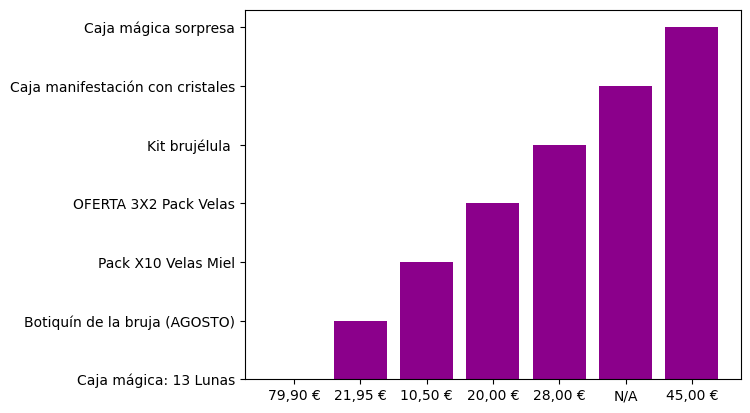

In [10]:
df = pd.DataFrame(list_products)
y = df['Producto']
x = df['Precio']

plt.bar(x, y, color='darkmagenta')
plt.show()


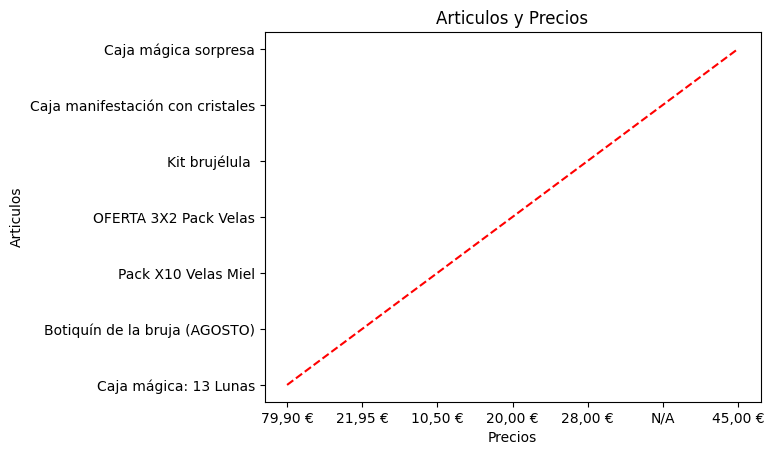

In [11]:
plt.plot(x, y, color='red', linestyle='--')
plt.title('Articulos y Precios')
plt.xlabel('Precios')
plt.ylabel('Articulos')
plt.show()